# MOD300: Mandatory Project 2
## Modeling the Worst: A Zombie and Ebola Outbreak

This is a **template notebook** for Project 2. It contains section headers, task descriptions, and placeholders for code and explanations.

---
### Student Info
- Name:
- Student ID:
---

## 1. Introduction
Provide a short introduction outlining the project goals and what will be investigated.



In [26]:
#Basic setup - imports, etc.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#plot styling
plt.rcParams.update({
    "figure.figsize": (7, 4),
    "axes.grid": True,
    "axes.spines.top": False,
    "axes.spines.right": False
})

#Random number generator
rng = np.random.default_rng(42)

## 2. Modeling a Zombie Outbreak - SZ Model
Re-state the SZ model equations and briefly describe them.

Variables:

$S(t)$: The number of susceptible humans at time t

$C(N)$: Average number of contacts made per unit time

$Z(t)$: Zombie population at time t

$\beta= p_Z \cdot C(N)$: Infection rate constant

$\frac{Z(t)}{N}$: Probability of meeting a Zombie

Transition Equation(Reduction in the human population):

$$ S(t + \Delta t) - S(t) = -\beta \, \Delta t \, \frac{Z(t)}{N} \, S(t) \tag{1} $$

Differential Equations:

$$\begin{align}
    \frac{dS(t)}{dt} = -\beta \, \frac{S(t) Z(t)}{N} \tag{2} \\
    \frac{dZ(t)}{dt} = \beta \, \frac{S(t) Z(t)}{N} \tag{3}
\end{align}$$

Analytical Solution:

$$\begin{align}
    S(t) = \frac{(S_0 + Z_0)\,\dfrac{S_0}{Z_0}\, \exp(-\beta t)}{1 + \dfrac{S_0}{Z_0}\, \exp(-\beta t)} \tag{4} \\
    Z(t) = \frac{S_0 + Z_0}{1 + \dfrac{S_0}{Z_0}\,\exp(-\beta t)} \tag{5} \\
    S_0 + Z_0 = N \tag{6}
\end{align}$$

## 3. Exercise 1: No hope?
- **Task 1:** Compare the fraction of the total population predicted to turn into zombies in Sokndal and Dirdal using the analytical solution.
- **Task 2:** Find the critical points of the model and explain the long-term fate of the population.

### Task 1
We are going to analyze the spread of a zombie infection in Sokndal and Dirdal using a basic SZ-model and compare the fraction of the total population that are predicted to turn into zombies.
This SZ-model divides the population into two groups:
- S(t): Susceptible humans(not yet infected)
- Z(t): Zombies

We are looking at two populations:
- Dirdal with a population of $N = 683$
- Sokndal with a population of $N = 3305$

Both towns start with one initial zombie, $Z0 = 1$, and infection rate $\beta = 0.06$, which determines how quickly susceptibles are converted into zombies upon contact.

Equations $(4)$ and $(5)$ describe how susceptibles($S(t)$) are converted into zombies($Z(t)$) over time($t$), with the infection rate($\beta$).The analytical solutions for the SZ-model is given in equations:
$$
S(t) = \frac{(S_0 + Z_0)\,\frac{S_0}{Z_0}\,\exp(-\beta t)}{1 + \frac{S_0}{Z_0}\,\exp(-\beta t)} \tag{4}
$$

$$
Z(t) = \frac{S_0 + Z_0}{1 + \frac{S_0}{Z_0}\,\exp(-\beta t)} \tag{5}
$$

These equations are implemented in the code block below and plotted on figure titled "SZ model (analytical): Fraction turning into zombies". 

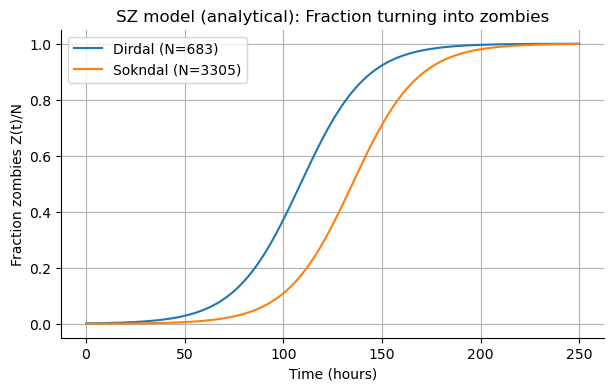

In [27]:
# Task 1

# Parameters
beta = 0.06 # Rate of infection per hour
pop = {"Dirdal": 683, "Sokndal": 3305} # population numbers in Dirdal and Sokndal
Z0 = 1 # Number of Zombies at time = 0

# Analytical solution for Susceptible humans S(t) - equation (4) from pdf
def S_analytic(t, S0, Z0, beta):
    expbt = np.exp(-beta * t)
    return ((S0 + Z0) * S0 * expbt) / (1.0 + (S0 / Z0) * expbt)

# Analytical solution for Zombies Z(t) - equation (5) from pdf
def Z_analytic(t, S0, Z0, beta):
    expbt = np.exp(-beta * t)
    return (S0 + Z0) / (1.0 + (S0 / Z0) * expbt)

# Time in hours
t = np.linspace(0, 250, 250)

# Plotting
plt.figure(figsize=(7, 4))
for place, N in pop.items():
    S0 = N - Z0
    Zt = Z_analytic(t, S0, Z0, beta)
    frac_zombies = Zt / N
    plt.plot(t, frac_zombies, label=f"{place} (N={N})")

plt.xlabel("Time (hours)")
plt.ylabel("Fraction zombies Z(t)/N")
plt.title("SZ model (analytical): Fraction turning into zombies")
plt.legend()
plt.grid(True)
plt.show()

### Task 1 Results and Conclusion

##### Figure
The figure titled "SZ model (analytical): Fraction turning into zombies" shows the fraction of zombies over time for Sokndal(orange line), and Dirdal(blue line). 

For both towns the zombie fraction rise towards 1.0, meaning the entire population will eventually be infected. In Dirdal the infection spreads faster because the population is smaller, meaning one zombie quickly infects a large fraction of the population. 

In Sokndal the outbreak grows more slowly due to it's larger population, but still reaches full infection.

##### Conclusion
The analysis demonstrates that the SZ-model, as long as infection rate $\beta > 0$ and $Z0 > 0$, we see that eventually the whole population gets infected. Infection dynamics are dependent on population size, and smaller towns fall faster to the zombie outbreak. Although this model is highly simplified, and assumes constant infection rate, no recovery and no prevention attempts from the humans, it shows the key mathematical insight: 

**Given enough time, the outbreak is unstoppable, no matter the population size**

### Task 2
In task 2 we analyze the long-term behaviour of the SZ-model, and explain why the entire human population will be eradicated and turned into zombies in the limit t->∞, regardless of the value of β > 0!

In other words we are going to show that given infinite time, all humans will become infected as long as the infection rate is higher than zero. To do this we examine the differential equations and identify the critical points:


We are given equations:
$$
\frac{dS}{dt} = -\frac{\beta SZ}{N}\tag{2}
$$
$$
\frac{dZ}{dt} = \frac{\beta SZ}{N}\tag{3}
$$

Rewriting equation $(3)$, using $S(t) = N - Z(t)$
$$
\frac{dZ}{dt} = \frac{\beta (N - Z)Z}{N}\tag{24}
$$

Critical points occur when $\frac{dZ}{dt} = 0$:
$$
\frac{\beta (N - Z)Z}{N} = 0
$$

Then we get two equilibrium solutions:
$$
Z = 0 \quad or \quad Z = N
$$

##### Case 1, if $Z = N$ a stable equilibrium:
$Z = N$ means that the number of zombies equals the population number, in other words, everyone is a zombie. Here all the susceptible humans are gone($S = 0$). If we imagine nudging the system a little bit with a small decrease($x$) in zombies $Z$, there would now be a small number of susceptible humans. Lets say $Z = N - x$ and we use equation $(3)$ we get:
$$
\frac{dZ}{dt} = \frac{\beta SZ}{N}\tag{3}
$$

$$
\frac{dZ}{dt}
= \frac{\beta}{N}\,x\,(N-x)
\approx \frac{\beta}{N}\,N\,x
= \beta\,x
> 0. \tag{25}
$$

Since $\beta > 0$, $(N - x) > 0$, and $x > 0$ equation $(25)$ is positive, the humans will be turned into zombies and the system will reach equilibrium $Z = N$, given enough time. Therefore the system is a stable equilibrium.

##### Case 2, if $Z, = 0$, an unstable equilibrium:
In case 2 we have $Z = 0$, which means the population is zombie free. Lets now see what happens if there is a tiny increase in zombies. Let $Z = x$, where $x > 0$ is very small, plugging in equation $(3)$:
$$
\frac{dZ}{dt} =
\frac{\beta(N-x)x}{N} 
\approx \frac{\beta Nx}{N}
= \beta x
$$
Since $\beta > 0$, $x > 0$, and $N > 0$, this derivative is positive. This means that as soon as there is one zombie, the number of zombies will start increasing, since they infect humans. Therefore, the equilibrium at $Z = 0$ is unstable. Any tiny disturbance makes the system move away from this point, and towards $Z = N$

##### In conclusion:
for any $\beta > 0$ and initial $Z(0) > 0$:
$$
\lim_{t \to \infty} Z(t) = N
$$

In task 1 and 2 we are dealing with a simplified SZ-model where we assume constant infection rate, constant population, and that the humans never fight back or take counter measures. This means that as long as the infection rate is positive, and there is atleast 1 zombie, the whole population will eventually be infected as shown.

## 4. Exercise 2: Numerical Solver Implementation
- **Task 1:** Implement one numerical solver (Forward Euler, Runge-Kutta, or adaptive).


In exercise 2 we move from the analytical SZ-model to a numerical approach. The SZ-model can be written in the general form given in the pdf:

$$
\frac{dy}{dt} = f(y, t), \qquad y = (S, Z) \tag{7}
$$

with

$$
f(y, t) = \left( -\frac{\beta S(t) Z(t)}{N}, \; \frac{\beta S(t) Z(t)}{N} \right) \tag{9}
$$

The aim of this exercise is twofold:
1. Implement a general numerical solver that can handle systems of ODEs of the form $\frac{dy}{dt} = f(y, t)$. We chose the Forward Euler method.
2. Apply the solver to the SZ-model and compare the numerical solution to the known analytical solution. This allows us to verify our implementation and see the impact of the time step $Δ
𝑡$ on accuracy and stability.

In [28]:
import numpy as np

def euler_solve(f, t_span, y0, dt):
    """
    Forward Euler integrator for y' = f(t, y).

    Parameters
    ----------
    f : callable
        Right-hand side f(t, y) -> array_like with same shape as y.
    t_span : (t0, t1)
        Start and end time.
    y0 : array_like
        Initial condition vector (e.g., [S0, Z0]).
    dt : float
        Fixed time step.

    Returns
    -------
    t : (n,) array
        Time points including both endpoints.
    y : (n, m) array
        Solution with one row per time point; columns correspond to state components.
    """
    t0, t1 = float(t_span[0]), float(t_span[1])
    y0 = np.asarray(y0, dtype=float)

    # number of steps (trim last step to land exactly on t1)
    n_steps = int(np.ceil((t1 - t0) / dt))
    t = np.empty(n_steps + 1, dtype=float)
    y = np.empty((n_steps + 1, y0.size), dtype=float)

    t[0], y[0] = t0, y0
    tn = t0
    yn = y0.copy()

    for k in range(n_steps):
        h = min(dt, t1 - tn)          # last small step if needed
        yn = yn + h * f(tn, yn)       # Forward Euler update
        tn = tn + h
        t[k + 1], y[k + 1] = tn, yn

    return t, y

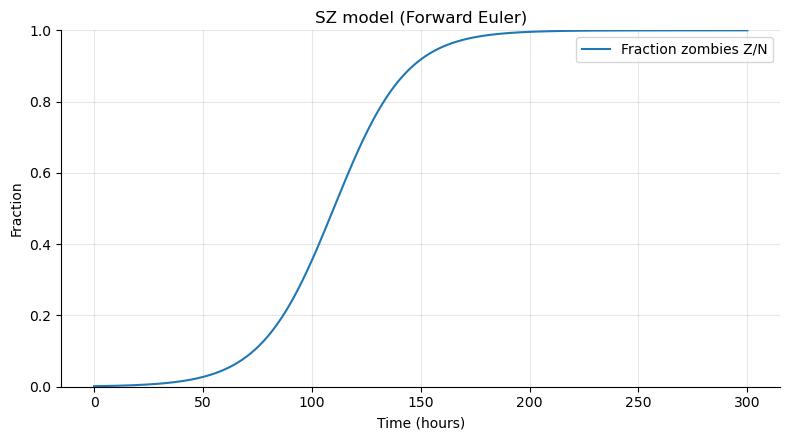

In [29]:
# SZ model RHS factory: works for constant beta or time-dependent beta(t)
def make_sz_rhs(beta):
    """
    Returns f(t, y) for the SZ model with y = (S, Z).
    beta: float or callable beta(t).
    """
    def f(t, y):
        S, Z = y
        N = S + Z
        b = beta(t) if callable(beta) else float(beta) # beta can be a function or a constant
        dS = -b * S * Z / N
        dZ = -dS
        return np.array([dS, dZ], dtype=float)
    return f


# Parameters from the text:
beta = 0.06  # 1/hr
N = 683      # try 3305 for Sokndal
Z0 = 1.0
S0 = N - Z0

f = make_sz_rhs(beta)
t, y = euler_solve(f, t_span=(0.0, 300.0), y0=[S0, Z0], dt=0.5)



plt.figure(figsize=(8,4.5))
plt.plot(t, y[:, 1] / N, label="Fraction zombies Z/N")
plt.xlabel("Time (hours)")
plt.ylabel("Fraction")
plt.title("SZ model (Forward Euler)")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

- **Task 2:** Solve the SZ model numerically and compare against analytical solution.
We now compare the numerical solution we got from our Forward Euler implementation against the analytical solution from equation $(4) and (5)$. 

The test case uses:
- Dirdal($N = 683$)
- Infection rate $\beta = 0.06 per hour$
- $Z0 = 1$ (one initial zombie). 

With $\Delta t = 0.5$ hours, the numerical and analytical solutions are shown below in figure "Fraction of zombies $Z/N$ over time, Euler vs Analytical."

N=683, dt=0.5 h
Max |S_num - S_exact| = 13.1218
Max |Z_num - Z_exact| = 13.1218
Max |(Z/N)_num - (Z/N)_exact| = 0.019212


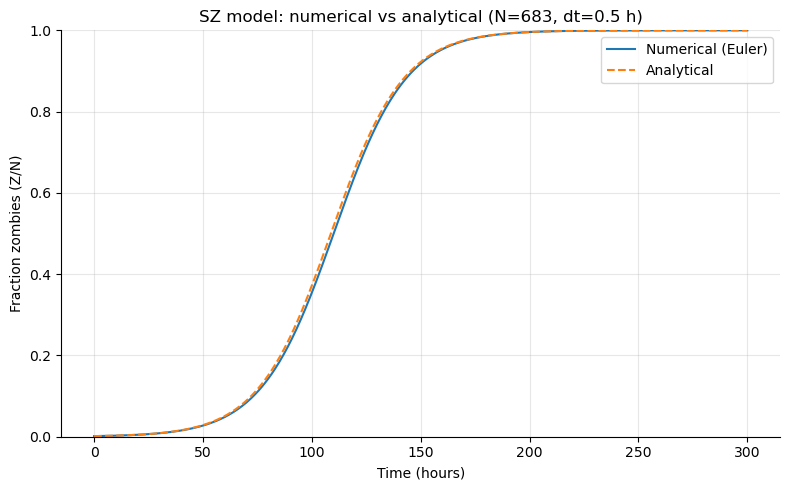

In [30]:
beta = 0.06        # 1/hr
N = 683            # try 3305 for Sokndal
Z0 = 1.0
S0 = N - Z0
t_span = (0.0, 300.0)   # hours
dt = 0.5                # start with a small step

# Build RHS and solve
f = make_sz_rhs(beta)
t_num, y_num = euler_solve(f, t_span=t_span, y0=[S0, Z0], dt=dt)

# Analytical on the same time grid
S_an = S_analytic(t_num, S0, Z0, beta)
Z_an = Z_analytic(t_num, S0, Z0, beta)

# Errors (absolute and fractional of population)
err_S = np.max(np.abs(y_num[:, 0] - S_an))
err_Z = np.max(np.abs(y_num[:, 1] - Z_an))
err_fracZ = np.max(np.abs((y_num[:,1]/N) - (Z_an/N)))

print(f"N={N}, dt={dt} h")
print(f"Max |S_num - S_exact| = {err_S:.4f}")
print(f"Max |Z_num - Z_exact| = {err_Z:.4f}")
print(f"Max |(Z/N)_num - (Z/N)_exact| = {err_fracZ:.6f}")

# Plot fraction zombies
plt.figure(figsize=(8,5))
plt.plot(t_num, y_num[:,1]/N, label="Numerical (Euler)")
plt.plot(t_num, Z_an/N, linestyle="--", label="Analytical")
plt.xlabel("Time (hours)")
plt.ylabel("Fraction zombies (Z/N)")
plt.title(f"SZ model: numerical vs analytical (N={N}, dt={dt} h)")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

As you can see in the graph above the numerical and analytical graphs are almost identical with $\Delta t = 0.5$.

Below we will see what happens by using different $\Delta t$ that get progressively larger.

We will be using the max error of $\frac{Z}{N}$ to analyze the difference. The max error is calculated with the following method:

$$
e(t_i) = \left| \frac{Z_{\text{num}}(t_i)}{N} - \frac{Z_{\text{exact}}(t_i)}{N} \right| \tag{26}
$$

$$
E_{\max} = \max_{i} e(t_i) \tag{27}
$$

First we compute the pointwise error over time and then we take the largest of those values across the whole simulation window.



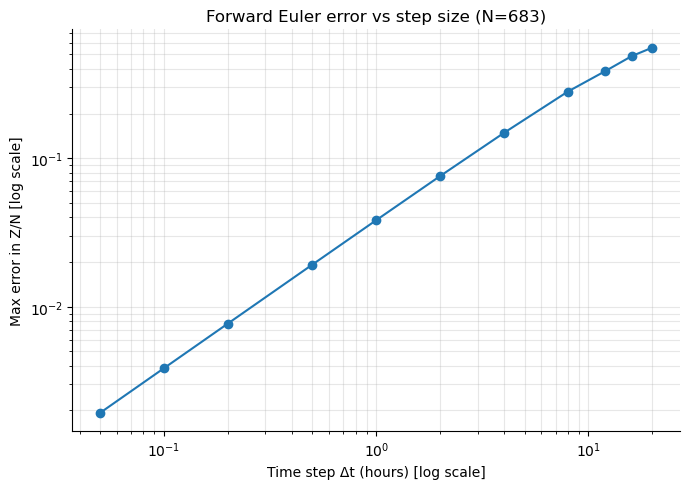

dt =  0.05 h  ->  max error(Z/N) = 0.001927
dt =  0.10 h  ->  max error(Z/N) = 0.003854
dt =  0.20 h  ->  max error(Z/N) = 0.007702
dt =  0.50 h  ->  max error(Z/N) = 0.019212
dt =  1.00 h  ->  max error(Z/N) = 0.038271
dt =  2.00 h  ->  max error(Z/N) = 0.075876
dt =  4.00 h  ->  max error(Z/N) = 0.148330
dt =  8.00 h  ->  max error(Z/N) = 0.281434
dt = 12.00 h  ->  max error(Z/N) = 0.386500
dt = 16.00 h  ->  max error(Z/N) = 0.487986
dt = 20.00 h  ->  max error(Z/N) = 0.556429


In [31]:
dts = np.array([0.05, 0.1, 0.2, 0.5, 1, 2, 4, 8, 12, 16, 20], dtype=float)

errors = []
f = make_sz_rhs(beta)
for dt in dts:
    
    t_num, y_num = euler_solve(f, t_span, [S0, Z0], dt)
    Z_an = Z_analytic(t_num, S0, Z0, beta)
    err = np.max(np.abs((y_num[:,1]/N) - (Z_an/N)))  # max error in fraction zombies
    errors.append(err)

errors = np.array(errors)

plt.figure(figsize=(7,5))
plt.loglog(dts, errors, marker="o")
plt.xlabel("Time step Δt (hours) [log scale]")
plt.ylabel("Max error in Z/N [log scale]")
plt.title(f"Forward Euler error vs step size (N={N})")
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.tight_layout()
plt.show()

for dt, e in zip(dts, errors):
    print(f"dt = {dt:>5.2f} h  ->  max error(Z/N) = {e:.6f}")

The output above shows the max error of $\frac{Z}{N}$ for the different values of $\Delta t$.

For small steps, the error seems to scale linearly but as the steps get larger the error gets exponentially worse.

Keeping the $\Delta t \le 0.5$ keeps the max error below $2\%$. At $\Delta t = 1$ it is $3.8\%$ and at $\Delta t = 2$ it is $7.6\%$ which is in the upper range of a usable range.

In the range $8 \le \Delta t \le 20$ the error increases significantly from ~$28\%$ to $56\%$

## 5. Exercise 3: Predicting the Fate of Sokndal and Dirdal
- **Task 1:** Estimate λ for Sokndal and Dirdal.

To show that people become more cautious over time during the outbreak, we will replace the the constant $\beta$ with the decaying function given as equation (10) in the project pdf. The $\lambda$ variable controls how quickly the transmission rate drops and it can be found by using equation (12) from the pdf and the information about the probability of being infected after $T$ hours for both Sokndal and Dirdal. The python cell below calculates and gives the $\lambda$ for both locations.


In [32]:
def lambda_from_T(T_hours, frac=0.6):
    """
    Given e^{-lambda * T} = frac, return lambda in 1/hour.
    """
    return -np.log(frac) / float(T_hours)

# Given: probability reduced to 60% after T hours
T_sokndal = 48.0   # hours
T_dirdal  = 72.0   # hours
frac = 0.6

lam_sok_hr = lambda_from_T(T_sokndal, frac)   # 1/hour
lam_dir_hr = lambda_from_T(T_dirdal,  frac)   # 1/hour

# Convert to per-day
lam_sok_day = lam_sok_hr * 24.0
lam_dir_day = lam_dir_hr * 24.0

print(f"Sokndal: λ = {lam_sok_hr:.6f} 1/hr  ({lam_sok_day:.6f} 1/day)")
print(f"Dirdal : λ = {lam_dir_hr:.6f} 1/hr  ({lam_dir_day:.6f} 1/day)")

# Sanity checks: should be ~0.6
print("Check Sokndal:  exp(-λT) =", np.exp(-lam_sok_hr * T_sokndal))
print("Check Dirdal :  exp(-λT) =", np.exp(-lam_dir_hr * T_dirdal))


Sokndal: λ = 0.010642 1/hr  (0.255413 1/day)
Dirdal : λ = 0.007095 1/hr  (0.170275 1/day)
Check Sokndal:  exp(-λT) = 0.6
Check Dirdal :  exp(-λT) = 0.6


Here we can see that the $\lambda$ for Sokndal is higher than Dirdal which is what we were expecting. A higher lambda means the population will adapt quicker to the outbreak. 

- **Task 2:** Solve the SZ model with time-dependent β(t) and determine how many people survive.

Now we implement the lambda's we found in the previous task into the time-dependent $\beta(t)$ (10) to solve the system numerically. We will be reusing the functions for the fixed-step Euler method numeric differentiation. We then look at the number of Survivors $S(t)$ after $t=1000$ hours to see the outcomes for both Dirdal and Sokndal. With the $\lambda$ for Sokndal being larger than for Dirdal, we expect that there will be a larger percentage of survivors in Sokndal compared to Dirdal.

 The calculations, graph and results are given below:

Dirdal: approx survivors ≈ 88.35 of 683 (12.94% survive)
Sokndal: approx survivors ≈ 3049.25 of 3305 (92.26% survive)


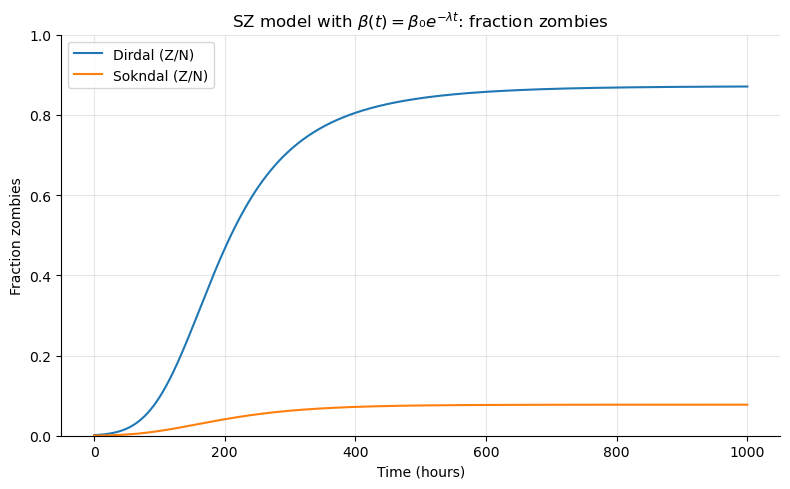

In [33]:
# --- given from earlier cells ---
# make_sz_rhs(beta)
# euler_solve(f, t_span, y0, dt)

# --- parameters ---
beta = 0.06        # 1/hr (from Exercise 1)
Z0    = 1.0         # one initial zombie

def lambda_from_T(T_hours, frac=0.6):
    """Solve e^{-lambda * T} = frac  ->  lambda = -ln(frac)/T."""
    return -np.log(frac) / float(T_hours)

# From the text: reach 60% of initial infection rate after T hours
lam_sok = lambda_from_T(48.0)   # Sokndal
lam_dir = lambda_from_T(72.0)   # Dirdal

# beta(t) for each place
beta_sok = lambda t: beta * np.exp(-lam_sok * t)
beta_dir = lambda t: beta * np.exp(-lam_dir * t)

# simulate long enough to reach a plateau
t_end = 1000.0   # hours
dt    = 0.25

results = []
for name, N, beta_fn in [
    ("Dirdal", 683,  beta_dir),
    ("Sokndal", 3305, beta_sok),
]:
    S0 = N - Z0
    f  = make_sz_rhs(beta_fn)
    t, y = euler_solve(f, (0.0, t_end), [S0, Z0], dt)
    S, Z = y[:,0], y[:,1]
    survivors = S[-1]                     # S at end ≈ survivors
    results.append((name, N, survivors, survivors/N, t, Z))

# print summary
for name, N, survivors, frac, _, _ in results:
    print(f"{name}: approx survivors ≈ {survivors:.2f} of {N} "
          f"({100*frac:.2f}% survive)")

# quick visualization (fraction zombies over time)
plt.figure(figsize=(8,5))
for name, N, _, _, t, Z in results:
    plt.plot(t, Z/N, label=f"{name} (Z/N)")
plt.xlabel("Time (hours)")
plt.ylabel("Fraction zombies")
plt.title(r"SZ model with $\beta(t)=\beta₀ e^{-\lambda t}$: fraction zombies")
plt.ylim(0, 1)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The effect of allowing the infection rate to decay over time, given by equation (10) in the project pdf, makes a big difference in the percentage of survivors for both towns. Sokndal ($T=48h$ → larger $\lambda$) has a faster decay which results in the transmission falling quickly and leaving approximately $S(t_{end}) \approx 92.3\%$ survivors. 

While in Dirdal(($T=72$ → smaller $\lambda$)), the infection rate does not decline as quickly, leaving only approximately $S(t_{end}) \approx 92.3\%$ survivors.

These results show that the infection rate $\beta(t)$ is highly sensitive to small changes in $\lambda$ because of the exponential decline.

## 6. Exercise 4: Counter Attacks - Kill them all?
- Extend the model to SEZR with compartments S, E, Z, R.
- Include incubation time and zombie removal.
- **Task 1:** Test survival without violent attacks.

For this task we are extending the SZ-model to a SEZR-model consisting of susceptible $S$, exposed $E$, zombies $Z$ and removed $R$. We assume no organized human attacks ($\omega(t) = 0$) and a constant infection rate $\beta$. 

The exposed $E$ class has an incubation period of 24 hours ($\sigma \;=\; \frac{1}{24}\ \text{h}^{-1}$). Humans are able to kill zombies at a constant background rate $\alpha$, which moves the zombies to the removed $R$ class.

We will be solving SEZR ODEs numerically with the Forward Euler method for both locations (Sokndal and Dirdal) with inital data $S_0=N-1$, $E_0=0$, $Z_0=1$, $R_0=0$ and look at the outcomes with a varying $\alpha$.

Using equation (17) from the project pdf and $\omega(t) = 0$ we get the following equation for the basic reproduction number $R_0$:

$\begin{align}
R_0 \;\simeq\; \frac{\beta}{\alpha}.
\end{align}$

We will test using the basic reproduction number $R_0$ whether survival is possible when $\frac{\beta}{\alpha}>1$. The expectation is that when $R_0>1$ that there will be no survivors as the infection rate $\beta$ is higher than zombie killing rate $\alpha$. And therefore we also expect survival when $R_0<1$



=== Sokndal (N=3305) ===


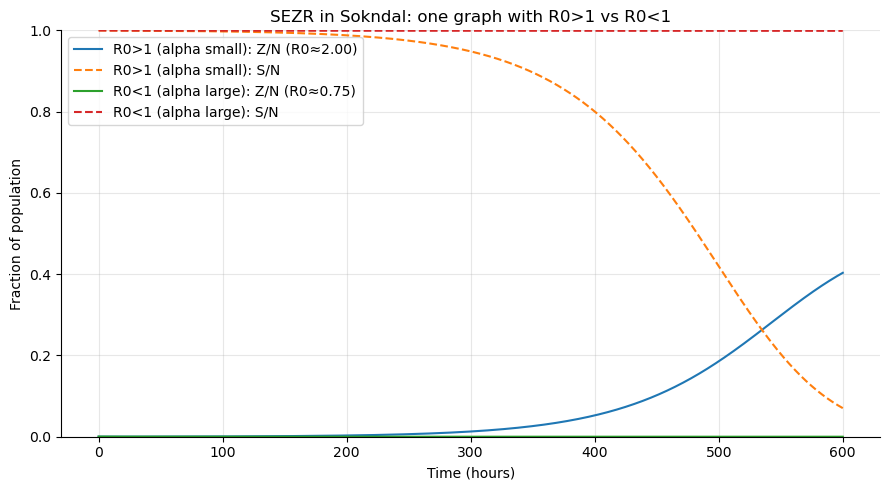

R0>1 (alpha small): alpha=0.030, R0≈2.00 | survivors ≈ 232.45 (7.03%) | peak Z/N ≈ 0.403 at t≈600.0 h
R0<1 (alpha large): alpha=0.080, R0≈0.75 | survivors ≈ 3301.03 (99.88%) | peak Z/N ≈ 0.000 at t≈0.0 h


In [57]:
# --- constants / location (reuse your euler_solve + make_sezr_rhs) ---
beta  = 0.06          # 1/hr
sigma = 1/24.0        # 1/hr (24h incubation)
locations = {"Sokndal": 3305}   # change to {"Dirdal": 683} if you like

def make_sezr_rhs(beta, alpha, sigma):
    def f(t, y):
        S, E, Z, R = y
        N = S + E + Z + R
        SEZ = (S * Z) / N if N > 0 else 0.0
        dS = -beta * SEZ
        dE =  beta * SEZ - sigma * E
        dZ =  sigma * E   - alpha * SEZ
        dR =  alpha * SEZ
        return np.array([dS, dE, dZ, dR], dtype=float)
    return f

def run_scenario(N, alpha, t_end=600.0, dt=0.25):
    S0, E0, Z0, R0 = N-1.0, 0.0, 1.0, 0.0
    f = make_sezr_rhs(beta=beta, alpha=alpha, sigma=sigma)
    t, y = euler_solve(f, t_span=(0.0, t_end), y0=[S0, E0, Z0, R0], dt=dt)
    S, E, Z, R = y.T
    return t, S, E, Z, R

# Try alpha on both sides of the threshold beta/alpha = 1
alpha_values = {
    "R0>1 (alpha small)": 0.03,  # beta/alpha = 2.00  → apocalypse expected
    "R0<1 (alpha large)": 0.08,  # beta/alpha = 0.75 → survival expected
}

for place, N in locations.items():
    print(f"\n=== {place} (N={N}) ===")

    # Run, collect stats, and make ONE overlay graph
    plt.figure(figsize=(9,5))
    summaries = []

    for label, alpha in alpha_values.items():
        t, S, E, Z, R = run_scenario(N, alpha, t_end=600, dt=0.25)
        R0 = beta / alpha
        survivors = S[-1]
        frac_survive = survivors / N
        i_peak = int(np.argmax(Z))
        t_peak = t[i_peak]
        peak_frac = Z[i_peak] / N

        summaries.append({
            "label": label,
            "alpha": alpha,
            "R0": R0,
            "survivors": survivors,
            "survivor_pct": 100*frac_survive,
            "t_peak": t_peak,
            "peak_frac": peak_frac,
        })

        # ONE figure: overlay both cases
        plt.plot(t, Z/N, label=f"{label}: Z/N (R0≈{R0:.2f})")
        plt.plot(t, S/N, linestyle="--", label=f"{label}: S/N")

    plt.title(f"SEZR in {place}: one graph with R0>1 vs R0<1")
    plt.xlabel("Time (hours)"); plt.ylabel("Fraction of population")
    plt.ylim(0, 1); plt.grid(True, alpha=0.3); plt.legend()
    plt.tight_layout(); plt.show()

    # Print concise summaries for both alphas
    for s in summaries:
        print(
            f"{s['label']}: alpha={s['alpha']:.3f}, R0≈{s['R0']:.2f} | "
            f"survivors ≈ {s['survivors']:.2f} ({s['survivor_pct']:.2f}%) | "
            f"peak Z/N ≈ {s['peak_frac']:.3f} at t≈{s['t_peak']} h"
        )

In the $R_0 > 1$ case ($\alpha = 0.03$, $R_0 = 2.00$), the infection rate is higher than the rate of killing zombies, leaving only approximately $232$($7\%$) survivors left at $T=600$ h. At the same time there is still $40\%$ zombie share of the total population, indicating that the outbreak is still ongoing and that the likelyhood of survival is extremely slim. 

In contrast, for $R_0 < 1$ ($\alpha = 0.08$, $R_0 = 0.75$), zombies are killed faster than they can attack and spread. In this scenario $3301$($99.88\%$) survived the zombie outbreak and there are no more zombies left.

With the simulations and understanding of math in the given scenario it would not be possible to survive in the long run if $R_0>1$ as the infection would spread faster than it could be stopped.


- **Task 2:** Test survival with violent attacks.

## 7. Exercise 5: Ebola Epidemic in West Africa
- Use provided Ebola case data files.
- **Task 1:** Plot number of new and cumulative Ebola cases for Guinea, Liberia, Sierra Leone.
- **Task 2:** Fit model to Guinea data by adjusting β0 and λ.
- **Task 3 (Optional):** Use optimization (e.g., `scipy.optimize.curve_fit`) to fit parameters for all three countries.

In [35]:
# Exercise 5 code goes here
# Placeholder: implement Ebola model and data fitting

## 8. Summary
Summarize the main insights gained from this project and reflect on challenges, limitations, and lessons learned.